### 3.2.2 Classification and regression with a two-layer perceptron

#### 3.2.2 Classification of linearly non-separable data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [85]:
def generateSubsets(n,scenario,sigma_A,sigma_B,verbose=1):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])


    class_A=np.zeros((2,n))
    class_B=np.zeros((2,n))

    class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
    class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]

    class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
    class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]

    np.random.shuffle(class_A.T)
    np.random.shuffle(class_B.T)

    if scenario == 0:
        class_A_train=class_A[:,:int(0.8*n)]
        class_B_train=class_B[:,:int(0.8*n)]
        class_A_val=class_A[:,int(0.5*n):]
        class_B_val=class_B[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,class_B_val),axis=1)
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=np.ones((X_val.shape[1]))
        #T_val[class_A_val.shape[1]:class_B_val.shape[1]] = -1*T_val[class_A_val.shape[1]:class_B_val.shape[1]]
        T_val[class_A_val.shape[1]:] = -1
    if scenario == 1:
        class_A_train=class_A[:,:int(0.5*n)]
        class_B_train=class_B
        class_A_val=class_A[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_A_val,np.ones((1,class_A_val.shape[1]))))
        T_val=np.ones((X_val.shape[1]))


    if scenario == 2:
        class_A_train=class_A
        class_B_train=class_B[:,:int(0.5*n)]
        class_B_val=class_B[:,int(0.5*n):]

        X=np.concatenate((class_A_train,class_B_train),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.concatenate((np.ones(class_A_train.shape[1]),-np.ones(class_B_train.shape[1])))

        X_val=np.concatenate((class_B_val,np.ones((1,class_B_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))

    if scenario == 3:
        mask_neg = class_A[1,:]<0
        mask_pos = class_A[1,:]>0
  
        class_A_train_neg = class_A[:,mask_neg]
        class_A_train_neg = class_A_train_neg[:,:int(0.2*class_A_train_neg.shape[1])]

        class_A_train_pos = class_A[:,mask_pos]
        class_A_train_pos = class_A_train_pos[:,:int(0.8*class_A_train_pos.shape[1])]
        
        X=np.concatenate((class_A_train_neg,class_A_train_pos),axis=1)
        X=np.concatenate((X,np.ones((1,X.shape[1]))))
        T=np.ones(X.shape[1])

        X_val = class_B
        X_val=np.concatenate((X_val,np.ones((1,X_val.shape[1]))))
        T_val=-np.ones((X_val.shape[1]))

    i = np.arange(X.shape[1])
    np.random.shuffle(i)
    X=X[:,i]
    T=T[i]


    i = np.arange(X_val.shape[1])
    np.random.shuffle(i)
    X_val=X_val[:,i]
    T_val=T_val[i]
    
    if verbose:
        #Plotting classes if desired
        if scenario == 3:
            #print(class_A_train_neg.shape)
            #print(class_A_train_pos.shape)
            plt_train_neg, = plt.plot(class_A_train_neg[0,:],class_A_train_neg[1,:],'g^', label='Class A(1,:)<0')
            plt_train_pos, = plt.plot(class_A_train_pos[0,:],class_A_train_pos[1,:],'bs', label='Class A(1,:)>0')
            plt_val, = plt.plot(class_B[0,:],class_B[1,:],'r*', label='Class B validation')
            plt.legend(handles=[plt_train_neg, plt_train_pos,plt_val])
            plt.show()
        else:
            plt_train_A, = plt.plot(class_A_train[0,:],class_A_train[1,:],'g^', label='Class A training')
            plt_train_B, = plt.plot(class_B_train[0,:],class_B_train[1,:],'bs', label='Class B training')
            
            if scenario==1:
                plt_val, = plt.plot(class_A_val[0,:],class_A_val[1,:],'r*', label='Class A validation')
                plt.legend(handles=[plt_train_A, plt_train_B,plt_val])
                plt.show()
            elif scenario == 0:
                plt_val1, = plt.plot(class_A_val[0,:],class_A_val[1,:],'r*', label='Class A validation')
                plt_val2, = plt.plot(class_B_val[0,:],class_B_val[1,:],'y*', label='Class B validation')
                plt.legend(handles=[plt_train_A, plt_train_B,plt_val1,plt_val2])
                plt.show()
            else:
                plt_val, = plt.plot(class_B_val[0,:],class_B_val[1,:],'r*', label='Class B validation')
                plt.legend(handles=[plt_train_A, plt_train_B,plt_val])
                plt.show()
            

    return X,T,X_val,T_val


In [86]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return ((Y-T)**2)

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return abs(T-Y)/2

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.zeros(W.shape)
    dv = np.zeros(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        mse_e_ = []
        acc_e_ = []
        weights1.append(W)
        weights2.append(V)
        for j in range(T.shape[0]):
            x = X[:,j]
            x = x.reshape(-1,1)
            t = T[j]
            H,O = forward_pass(x,W,V)
            mse = error_mse(t,O)
            acc = accuracy(t,O)
            mse_e_.append(mse)
            acc_e_.append(acc)
            delta_o,delta_h = backward_pass(O,t,H,V,hidden)
            W,V,dw,dv = update_weights(x,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
            #print(H)
            #print("print")
            #print(Y)
        mse_errors.append(np.mean(mse_e_))
        accuracys.append(np.sum(acc))
    weights1.append(W)
    weights2.append(V)
        
    return weights1, weights2,mse_errors,accuracys


In [87]:
def weights_init_MLP(n_out,n_in,scale,hidden):
    W = scale*np.random.randn(hidden,nPerceptron+1)
    V = scale*np.random.randn(1,hidden+1)
    #print(W.shape)
    #W = np.append(W,scale*np.random.normal())
    #W = np.hstack((W,np.random.normal()))
    #print(W.shape)
    return V,W

In [88]:
def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        if classification:
            for p in range(prediction.shape[1]):
                if prediction[0,p] >0:
                    prediction[0,p] = 1
                else:
                    prediction[0,p] = -1
            
        return prediction

In [89]:
def plot_decision_boundary(X,T, W,V, h = 0.1):
        x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
        y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        
        grid_data = np.transpose(np.c_[xx.ravel(), yy.ravel()])
        print(yy.shape)
        ones = np.ones((1,grid_data.shape[1]))
        grid_data = np.vstack((grid_data,ones))
        print("decision")
        print(grid_data.shape)
        print(ones.shape)
        print(W.shape)
        print(V.shape)
        Z = predict(grid_data,W,V, True)
        #print(Z)
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[0, :], X[1, :],c= T, cmap=clr.ListedColormap(['blue','green']))
        plt.show()

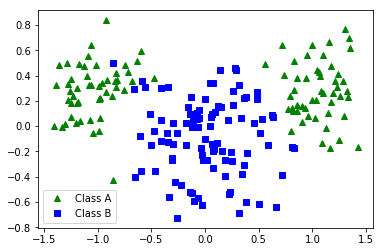

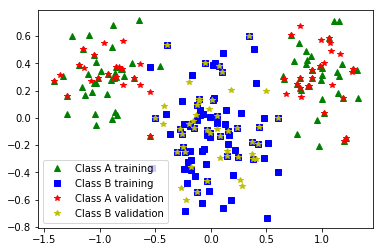

(160,)
(35, 48)
decision
(3, 1680)
(1, 1680)
(15, 3)
(1, 16)


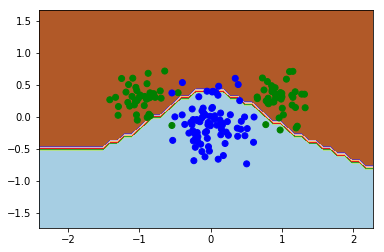

(10001, 15, 3)
(10001, 1, 16)
[[ 1.16874178 -1.04545321  0.93512191 -1.19897287  1.20898111  1.35520418
   1.34037975  1.42570139  1.02744359 -1.05871489 -0.83905317 -1.06510702
  -0.7439018   0.85944306 -0.75017874  1.17065356  1.23036197  0.99791839
   0.81263112 -0.92630902 -0.85674751 -0.81747505 -0.82888823 -0.4790345
  -0.87033786 -0.59761295 -0.68216268  1.30666883  1.14893131 -1.06800818
   1.23715816  0.82391754  1.08656921 -0.97803079  1.33035802 -1.0992849
   1.25882531 -0.95476678  1.15072601  0.85837602 -0.72117429  1.07854005
   0.73854145  0.83237832  1.03441601  1.25257362 -1.27527737  1.18913983
  -1.1742197   0.82804636]
 [-0.17294673 -0.05516345  0.14372466  0.02662968  0.35446038  0.61418337
   0.69830599 -0.16117907  0.06372812  0.63877769  0.35741559  0.32443924
   0.48384342  0.11795709  0.28828785  0.47473915  0.30596691  0.20807087
   0.14436978  0.26634202 -0.42412186  0.36576337  0.31226443  0.37674638
   0.23668607  0.59322058  0.35409126  0.76460823  0.1029

In [91]:
eta = 1e-4
#n_in = 
n_out = 1
nPerceptron = 3
scale = 1
hidden_perceptrons = 15
epochs = 10000
n = 100
#W,V = weights_init_MLP(n_out,n_in,scale,nPerceptron)
#X,T = generatePattern(1000,verbose=1)

#print(W.shape)
#print(V.shape)
#print(X.shape)
#validation = X[:,180:199]
#print("VAL")
#print(validation)
#validation_T = T[180:199]
#X = X[:,0:179]
#print(X.shape)
#T = T[0:179]
    #print(validation_T)
mu_A = np.array([1.0, 0.3])
mu_B = np.array([0.0, -0.1])
sigma_A = 0.2
sigma_B = 0.3


class_A=np.zeros((2,n))
class_B=np.zeros((2,n))
class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]
class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]
np.random.shuffle(class_A.T)
np.random.shuffle(class_B.T)


#Plotting classes if desired
plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
plt.legend(handles=[plt_A, plt_B])
plt.show()

class_A_train=class_A[:,:int(0.5*n)]
class_B_train=class_B
class_A_val=class_A[:,int(0.5*n):]


X=np.concatenate((class_A_train,class_B_train),axis=1)
X=np.concatenate((X,np.ones((1,np.shape(X)[1]))))
T=np.concatenate((np.ones(np.shape(class_A_train)[1]),-np.ones(np.shape(class_B_train)[1])))
i = np.arange(X.shape[1])
np.random.shuffle(i)
X=X[:,i]
T=T[i]
#print(X)
X_val=np.concatenate((class_A_val,np.ones((1,np.shape(class_A_val)[1]))))
T_val=np.ones((np.shape(class_A_val)[1]))
i = np.arange(X_val.shape[1])
np.random.shuffle(i)
X_val=X_val[:,i]
T_val=T_val[i]

sigma_A = 0.2
sigma_B = 0.3
X,T,val_X,val_T = generateSubsets(n,0,sigma_A,sigma_B,1)

W=np.random.randn(hidden_perceptrons,np.shape(X)[0])
V=np.random.randn(1,hidden_perceptrons+1)
print(T.shape)

W_train,V_train,mse,acc = backprop(eta,X,T,W,V,hidden_perceptrons,epochs)
mse_val = []
mse_e_val = []
acc_val = []
acc_e_val = []
W_train = np.array(W_train)
V_train = np.array(V_train)
plot_decision_boundary(X,T,W_train[W_train.shape[0]-1,:,:],V_train[W_train.shape[0]-1,:,:])
print(W_train.shape)
print(V_train.shape)
print(X_val)
print(T_val)
for i in range(1,W_train.shape[0]):
    
    p = predict(X_val,W_train[i,:,:],V_train[i,:,:],False)
    #print(p.shape)
    mse_val.append(np.mean(error_mse(T_val,p)))
    acc_val.append(np.sum(accuracy(T_val,p)))
    #if i % T.shape[0] == 0:
        
        #mse_val.append(np.mean(mse_e_val))
        #acc_val.append(np.sum(acc_e_val))

print("mse")
#print(mse_val)
print("acc")
#print(acc)


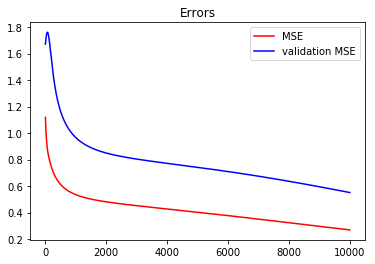

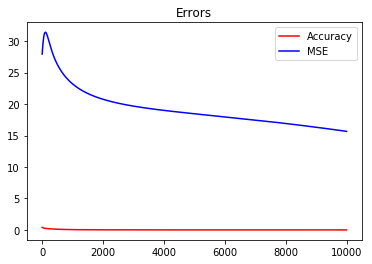

In [83]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt_mse_val, = plt.plot(np.linspace(0,epochs,epochs),mse_val,'b', label='validation MSE')
plt.legend(handles=[plt_mse,plt_mse_val])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
#print(mse_val[8000])
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'r',label='Accuracy')
plt_acc_val, = plt.plot(np.linspace(0,epochs,epochs),acc_val,'b', label='MSE')
plt.legend(handles=[plt_acc,plt_acc_val])
plt.title('Errors')
plt.show()

Om vi ökar learning rate ca=1e-2 ökar antal hiddenperecptrons=20, minskar datapunkter till 50, ökar sigma typ 0.7 så att allt är en enda röra. Då om vi kör typ 40000 epoker får vi förväntat beteende gällande overfit.